In [1]:
import pandas as pd
liver = pd.read_csv('https://hds5210-data.s3.amazonaws.com/indian_liver_patient.csv')

# Single Grouping Field

In [2]:
liver.groupby("Gender").count()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Gender,,,,,,,,,,
Female,142,142,142,142,142,142,142,142,140,142
Male,441,441,441,441,441,441,441,441,439,441


In [3]:
liver.groupby("Gender").count().reset_index()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,142,142,142,142,142,142,142,142,140,142
1,Male,441,441,441,441,441,441,441,441,439,441


In [4]:
liver.groupby("Gender", as_index=False).count()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,142,142,142,142,142,142,142,142,140,142
1,Male,441,441,441,441,441,441,441,441,439,441


# Grouping by Multiple Fields at Once

In [5]:
liver.groupby(["Gender","Age"], as_index=False).count()

,Gender,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,Female,7,1,1,1,1,1,1,1,1,1
1,Female,8,1,1,1,1,1,1,1,1,1
2,Female,10,1,1,1,1,1,1,1,1,1
3,Female,13,2,2,2,2,2,2,2,2,2
4,Female,17,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
116,Male,73,2,2,2,2,2,2,2,2,2
117,Male,74,2,2,2,2,2,2,2,2,2
118,Male,75,12,12,12,12,12,12,12,12,12
119,Male,78,1,1,1,1,1,1,1,1,1


# Common Custom Grouping Procedure

1. Create the new field you want to group by
2. Group by

In [6]:
liver["Decade"] = liver["Age"] // 10

In [7]:
liver.groupby("Decade").count()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Decade,,,,,,,,,,,
0,6,6,6,6,6,6,6,6,6,6,6
1,32,32,32,32,32,32,32,32,32,32,32
2,67,67,67,67,67,67,67,67,67,66,67
3,120,120,120,120,120,120,120,120,120,119,120
4,128,128,128,128,128,128,128,128,128,127,128
5,97,97,97,97,97,97,97,97,97,96,97
6,92,92,92,92,92,92,92,92,92,92,92
7,38,38,38,38,38,38,38,38,38,38,38
8,2,2,2,2,2,2,2,2,2,2,2


# Custom Age Buckets

0-18, 19-44, 45-64, 65-84, and 85

1. Create a function that generates the grouping buckets you need
2. Set your input field to be the data frame index
3. Create a groupby using your custom function

In [8]:
# 1. Create a function to generate teh grouping buckets
#    Note that the labels here are prefixed with a letter to make them more easily sortable.
#    There's also an "unknown" that sorts at the bottom as Z

def cms_ages(age):
    ranges = [
        {'min': 0,  'max': 18,  'label': 'A.  0-18'},
        {'min': 19, 'max': 44,  'label': 'B. 19-44'},
        {'min': 45, 'max': 64,  'label': 'C. 45-64'},
        {'min': 65, 'max': 84,  'label': 'D. 65-84'},
        {'min': 85, 'max': 999, 'label': 'E. 85-up'}
    ]

    for r in ranges:
        if age >= r.get('min') and age <= r.get('max'):
            return r.get('label')

    return 'Z. Unknown'

In [9]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Decade
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,6
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,6
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,6
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,5
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,7


In [10]:
liver.set_index('Age').head()

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Decade
Age,,,,,,,,,,,
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,6
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,6
62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,6
58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,5
72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,7


In [11]:
by_cms_age = liver.set_index("Age").groupby(cms_ages)

In [12]:
by_cms_age.count().reset_index()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Decade
0,A. 0-18,36,36,36,36,36,36,36,36,36,36,36
1,B. 19-44,239,239,239,239,239,239,239,239,237,239,239
2,C. 45-64,231,231,231,231,231,231,231,231,229,231,231
3,D. 65-84,75,75,75,75,75,75,75,75,75,75,75
4,E. 85-up,2,2,2,2,2,2,2,2,2,2,2


# Using a Categorical Series

Categories are a special data type that has a defined domain...  "Gender is always Male, Female, or Unknown"

In [13]:
gender_type = pd.CategoricalDtype(categories=["Famail","Male","Unknown"], ordered=True)

In [20]:
liver = pd.read_csv('indian_liver_patient.csv')

In [21]:
liver["Gender"] = liver["Gender"].astype(gender_type)

In [22]:
liver.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,NaN,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
liver.count()

,0
Age,583
Gender,441
Total_Bilirubin,583
Direct_Bilirubin,583
Alkaline_Phosphotase,583
Alamine_Aminotransferase,583
Aspartate_Aminotransferase,583
Total_Protiens,583
Albumin,583
Albumin_and_Globulin_Ratio,579


In [24]:
liver.fillna('Unknown', inplace=True)

<ipython-input-24-d69cf048985f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  liver.fillna('Unknown', inplace=True)


In [25]:
liver.groupby("Gender", observed=False).count()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Gender,,,,,,,,,,
Famail,0,0,0,0,0,0,0,0,0,0
Male,441,441,441,441,441,441,441,441,441,441
Unknown,142,142,142,142,142,142,142,142,142,142


# Grouping DateTime Fields


In [30]:
condemnations = pd.read_csv('condemn.txt')

In [31]:
condemnations.columns

Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

In [32]:
condemnations["InspectDate"].head()

,InspectDate
0,1986-07-10 00:00:00
1,2009-07-23 00:00:00
2,2003-08-06 00:00:00
3,1996-06-17 00:00:00
4,2006-12-20 00:00:00


In [33]:
condemn = condemnations[["InspectDate","Status"]]

In [36]:
condemn['InspectDate'] = pd.to_datetime(condemn['InspectDate'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')


<ipython-input-36-25324a02ecd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condemn['InspectDate'] = pd.to_datetime(condemn['InspectDate'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [37]:
condemn.head()

,InspectDate,Status
0,NaT,W
1,NaT,B
2,NaT,NaN
3,NaT,W
4,NaT,NaN


In [40]:
# Convert 'InspectDate' to datetime, handling errors by setting them to NaT
condemn['InspectDate'] = pd.to_datetime(condemn['InspectDate'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')


<ipython-input-46-795db5cf5607>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condemn['InspectDate'] = pd.to_datetime(condemn['InspectDate'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')


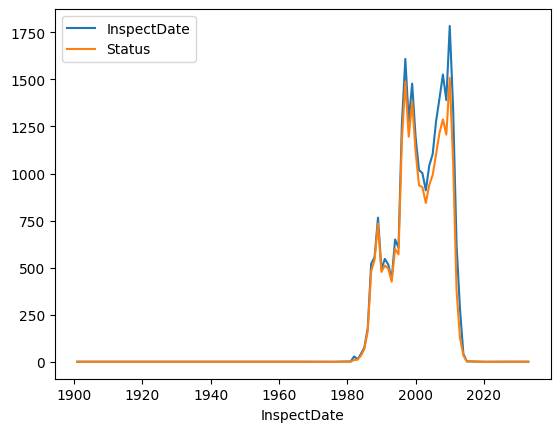

In [46]:
import pandas as pd

# Assuming 'condemnations' is your original DataFrame
condemn = condemnations[["InspectDate", "Status"]]

# Convert 'InspectDate' to datetime, handling errors by setting them to NaT
condemn['InspectDate'] = pd.to_datetime(condemn['InspectDate'].astype(str), format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Group by year
by_year = condemn.groupby(condemn['InspectDate'].dt.year)

# Check if 'by_year' has any groups before plotting
if by_year.ngroups > 0:
  by_year.count().plot()
else:
  print("No data available for plotting. Check 'InspectDate' column and groUping.")

In [43]:
by_year.count().head()

,InspectDate,Status
InspectDate,,
1901.0,1,1
1904.0,1,1
1905.0,1,1
1906.0,1,1
1907.0,1,1


<ipython-input-44-05c0f667f16d>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  condemn.groupby(pd.Grouper(key="InspectDate", freq='Q')).count().plot()


<Axes: xlabel='InspectDate'>

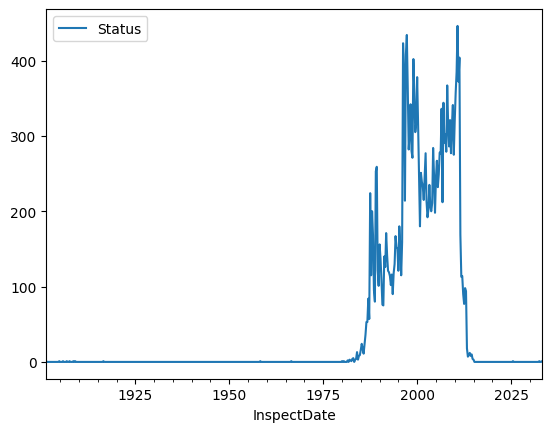

In [44]:
condemn.groupby(pd.Grouper(key="InspectDate", freq='Q')).count().plot()

<Axes: xlabel='InspectDate'>

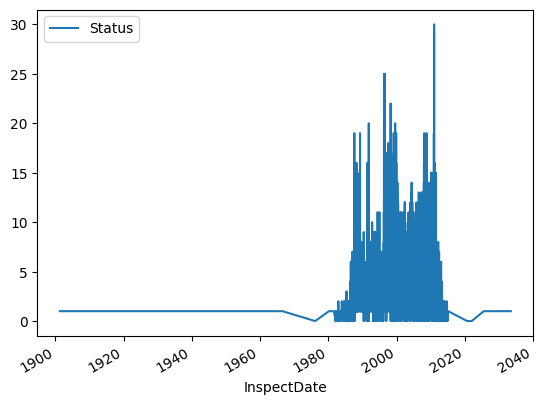

In [45]:
condemn.groupby("InspectDate").count().plot()